# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

from sklearn.model_selection import train_test_split

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## Data Overview

- Observations
- Sanity checks

In [3]:
visa_df = pd.read_csv('EasyVisa.csv')

In [4]:
data = visa_df.copy()

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
data.shape

(25480, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [12]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [13]:
data['no_of_employees'] = data['no_of_employees'].abs()

In [14]:
cat_list = list(data.select_dtypes('object').columns)

for column in cat_list:
  print(data[column].value_counts())
  print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [15]:
data['case_id'].nunique()

25480

In [16]:
data.drop(['case_id'], axis=1, inplace=True)

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

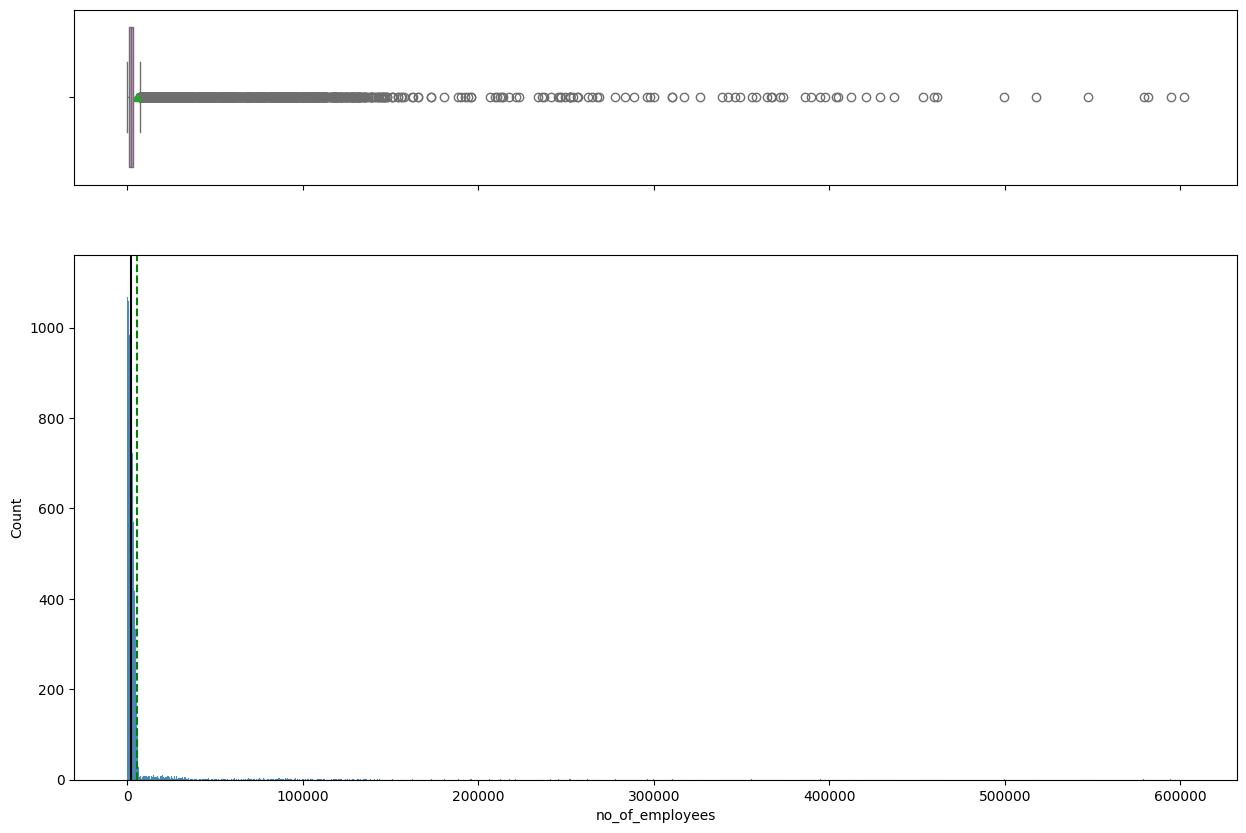

In [18]:
histogram_boxplot(data, 'no_of_employees')

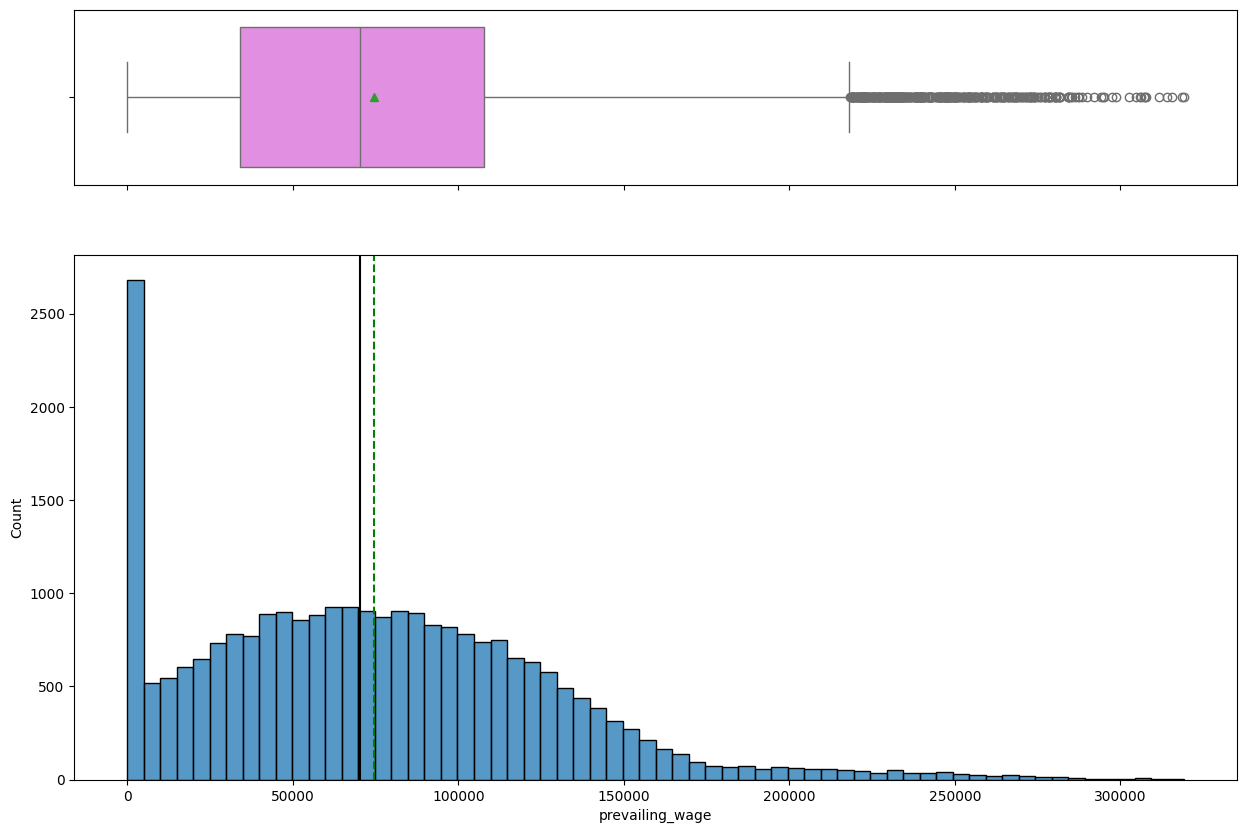

In [19]:
histogram_boxplot(data, 'prevailing_wage')

In [20]:
data.loc[data['prevailing_wage'] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [21]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

In [22]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=60, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)

    plt.show()

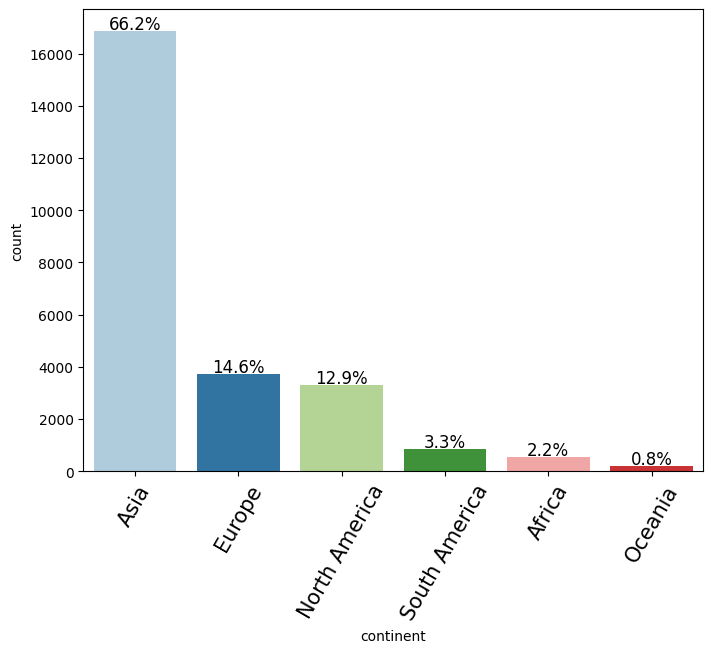

In [23]:
labeled_barplot(data, 'continent', perc=True)

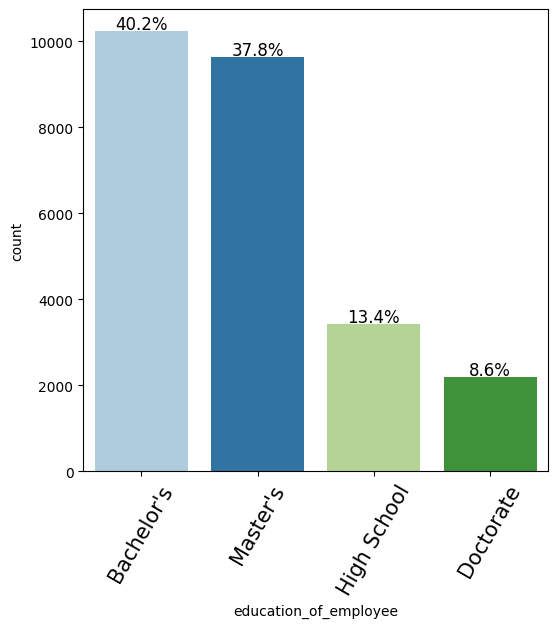

In [24]:
labeled_barplot(data, 'education_of_employee', perc=True)

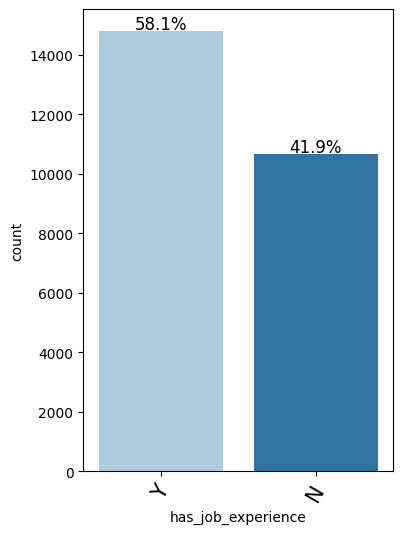

In [25]:
labeled_barplot(data, 'has_job_experience', perc=True)

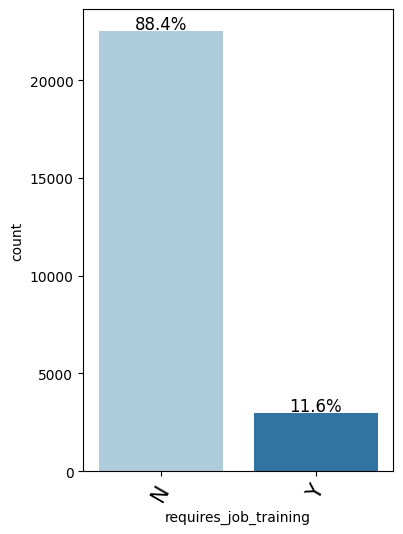

In [26]:
labeled_barplot(data, 'requires_job_training', perc=True)

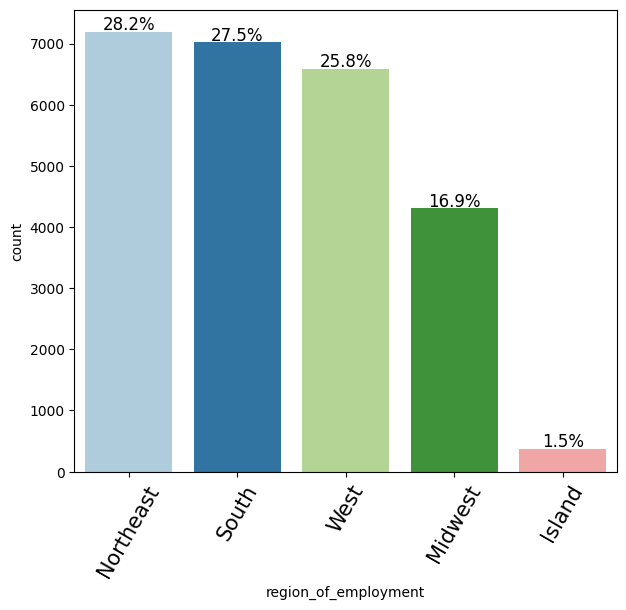

In [27]:
labeled_barplot(data, 'region_of_employment', perc=True)

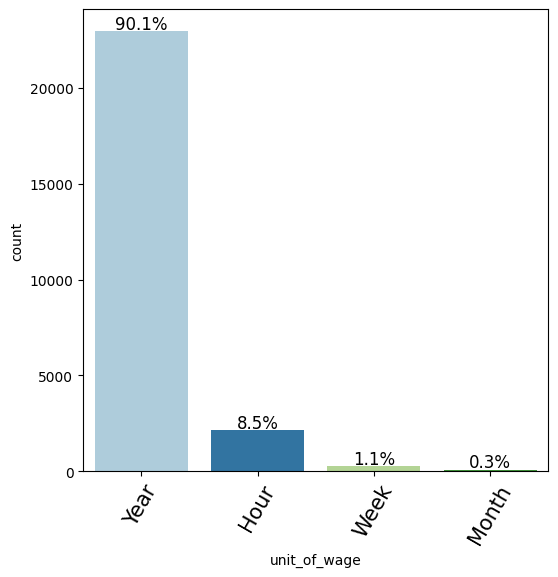

In [28]:
labeled_barplot(data, 'unit_of_wage', perc=True)

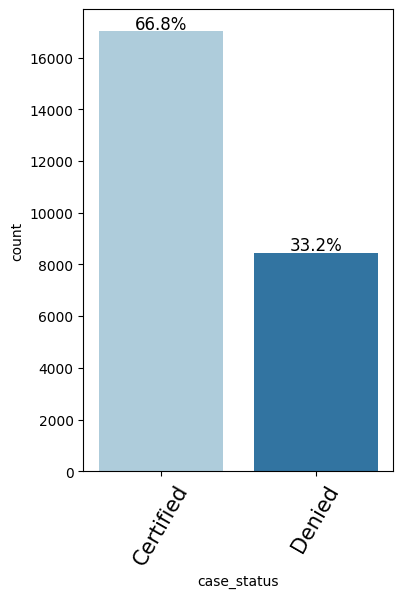

In [29]:
labeled_barplot(data, 'case_status', perc=True)

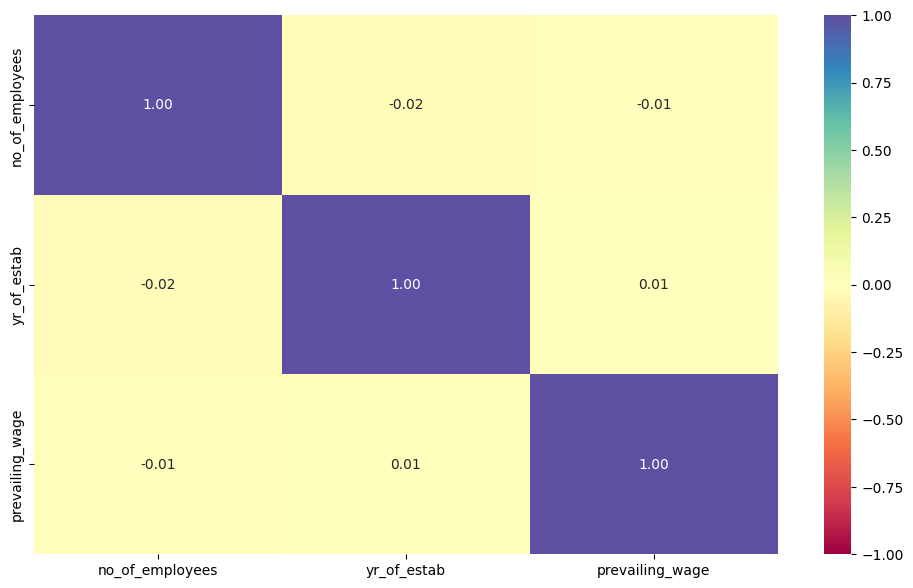

In [30]:
col_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12,7))
sns.heatmap(data[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

*We can see from the correlation matrix above that that there isn't any significant correlation between the Number of employees, Year of Establishment, or Prevailing Wage.*

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [31]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="green",
        stat="density",)

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="yellow",
        stat="density",)

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="coolwarm")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="coolwarm",)

    plt.tight_layout()
    plt.show()

In [32]:
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="lower left", frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


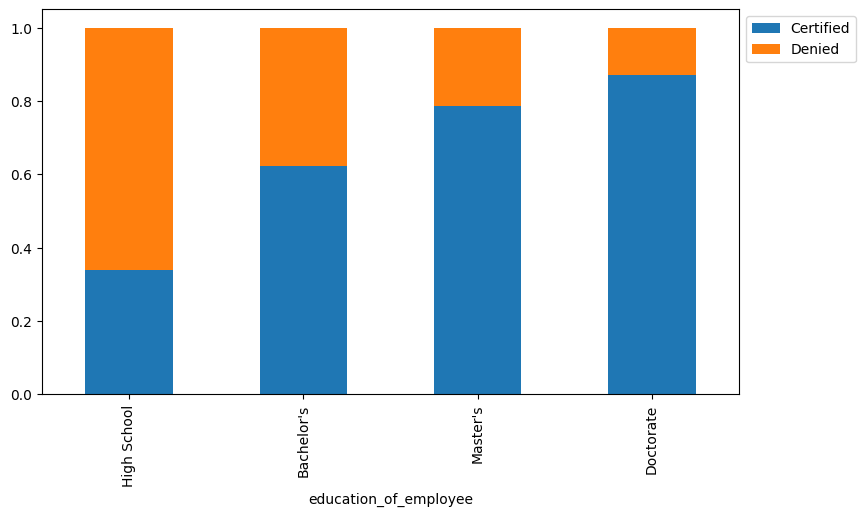

In [33]:
stacked_barplot(data, 'education_of_employee', 'case_status')

*Based on the barplot above, we can see that the education plays quite a significant role in visa certification. There is a positively linear trend in the amount of approved certifications as educaiton level increases.*

**2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


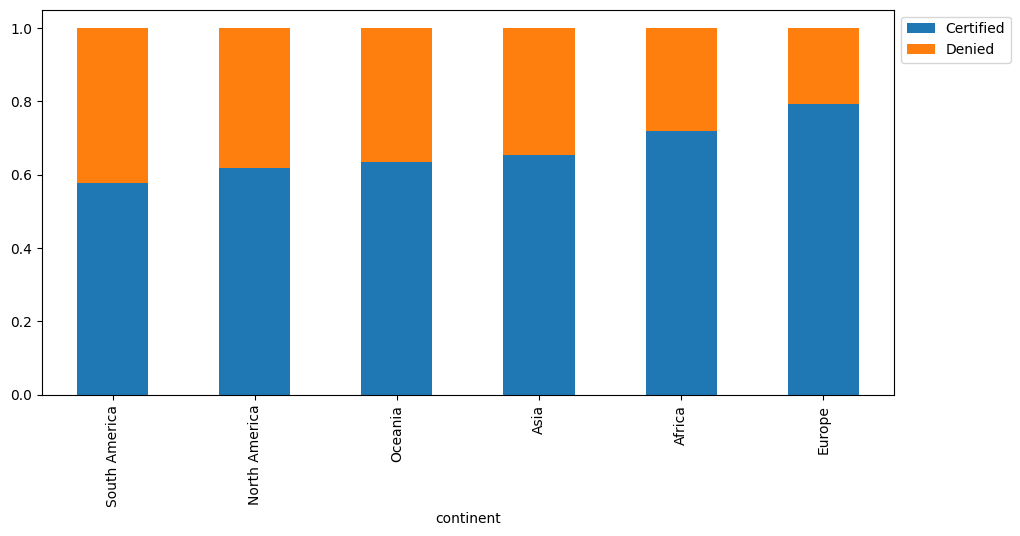

In [34]:
stacked_barplot(data, 'continent', 'case_status')

*The visa status has little variation across the different continents. Europe has the highest percentage of approved certifications at around 80%, while South America comes in with the least at just under 60%.*

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


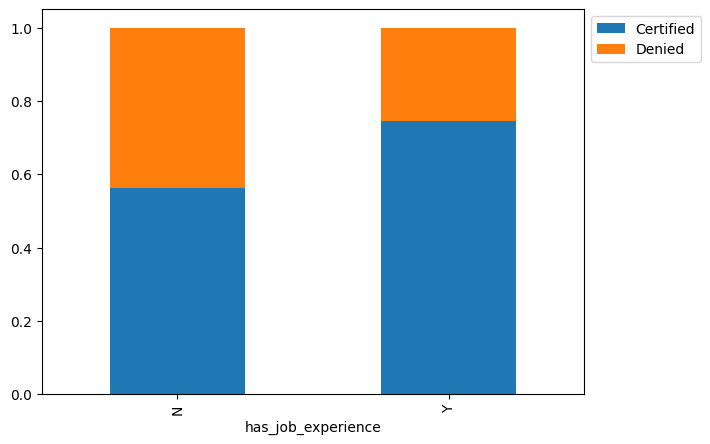

In [35]:
stacked_barplot(data, 'has_job_experience', 'case_status')

*It seems as though work experience does have a decent amount of influence on visa status, as there are significantly more approved visas among those with work experience as compared to those without.*

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


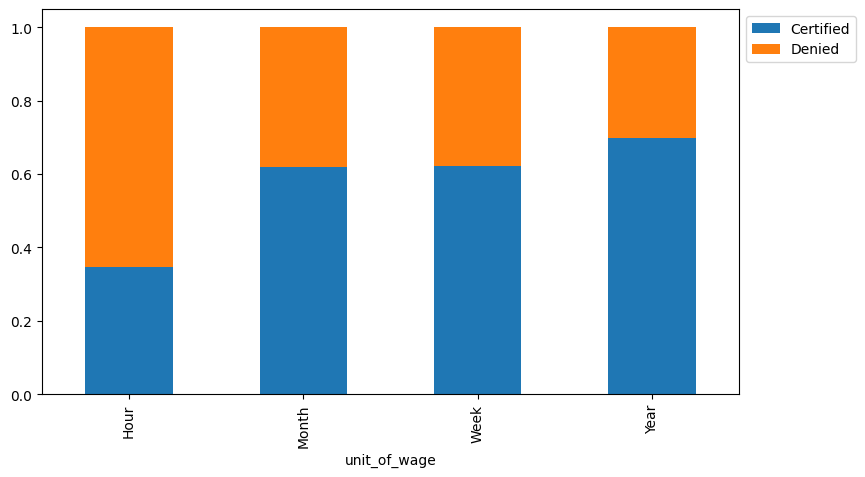

In [36]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

*When it comes to the wage unit, those employees with a weekly, monthly, and annual salary seem to have a similar rate of approval for their visas, with the annual unit having the most at around 65%. Meanwhile, those with an hourly wage are far more likely to get denied their visa, with only around a 35% approval rate.*

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

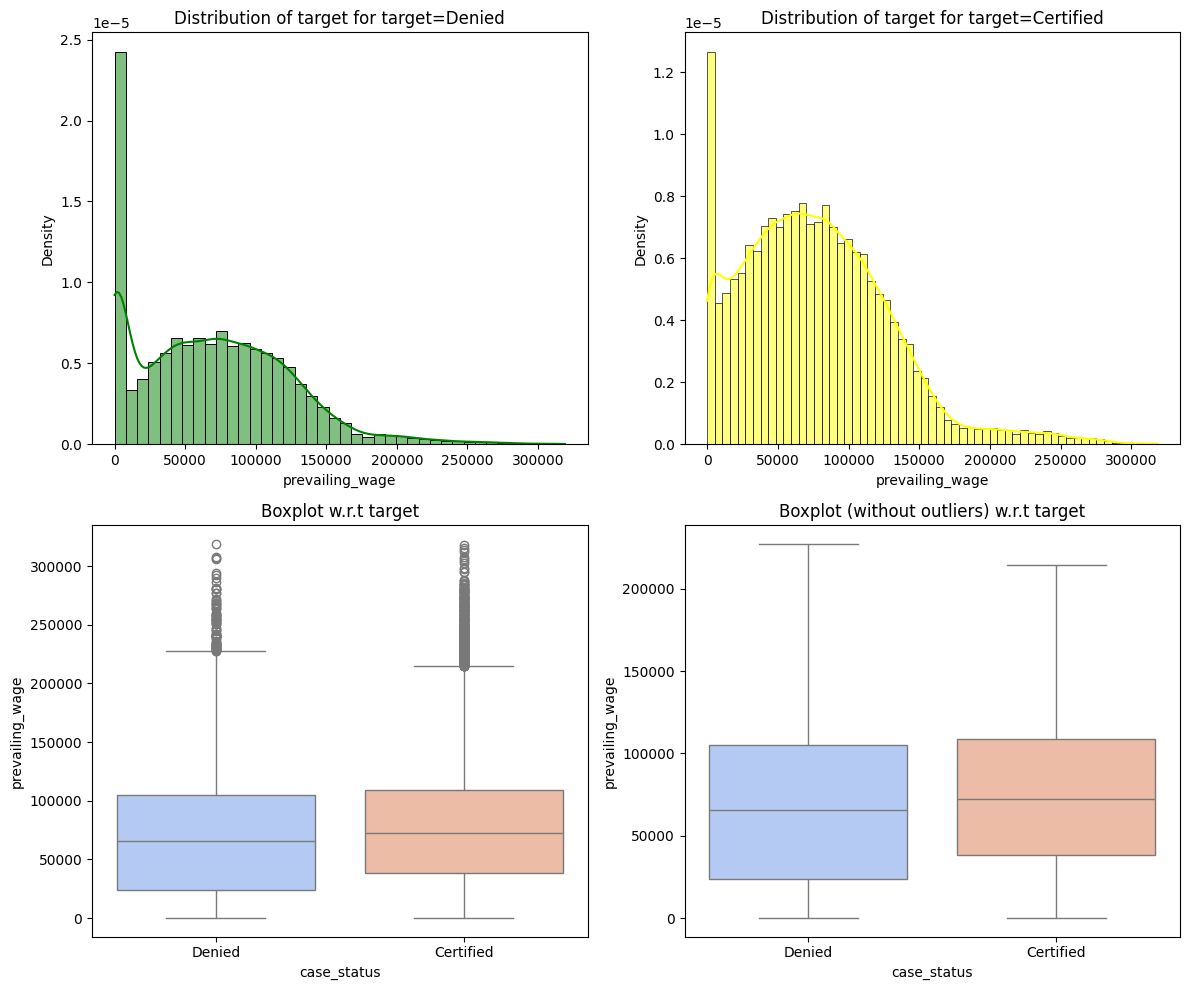

In [37]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

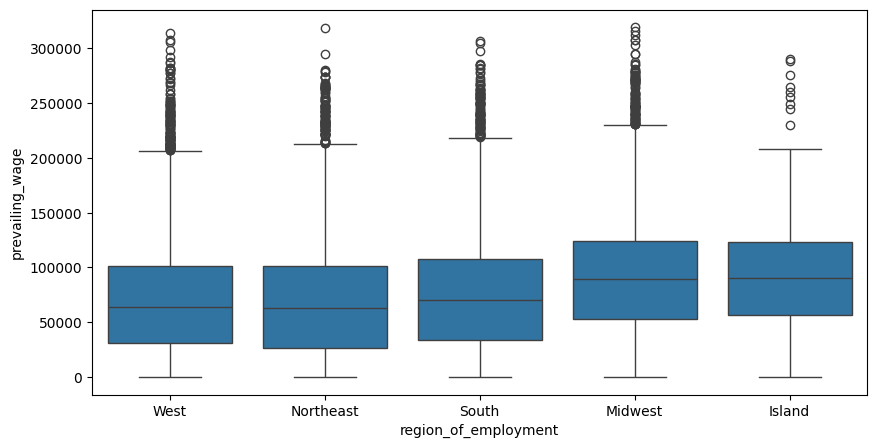

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x= 'region_of_employment', y= 'prevailing_wage')
plt.show()

*Surprisingly enough, there is no significant difference between visa status across the scale of prevailing wages.*

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

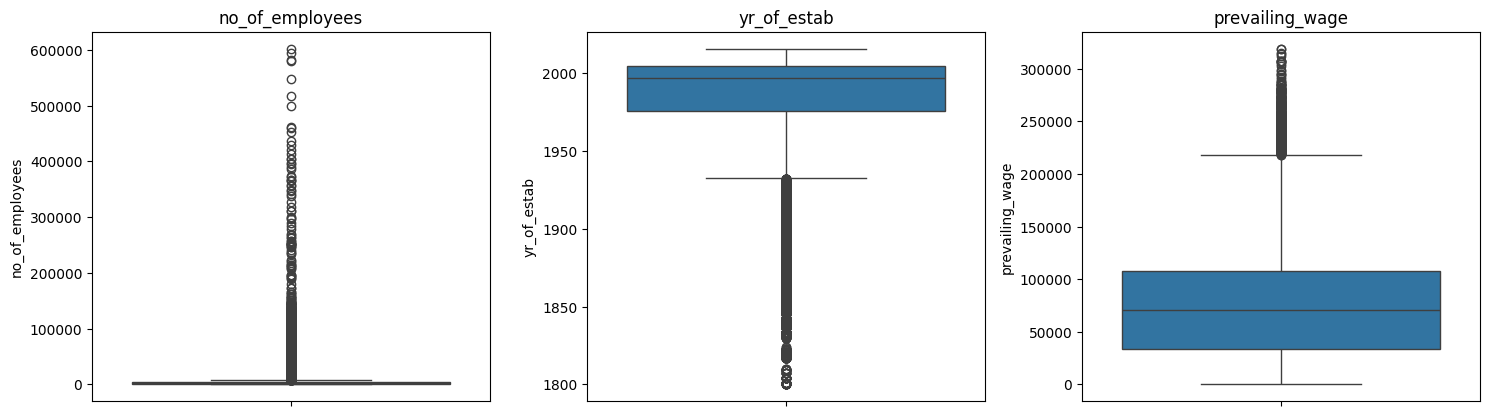

In [39]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,12))

for i, variable in enumerate(num_cols):
  plt.subplot(3, 3, i+1)
  sns.boxplot(data[variable])
  plt.title(variable)

plt.tight_layout()
plt.show()

In [40]:
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))

for col in num_cols:
    median_val = data[col].median()
    data.loc[outliers[col], col] = median_val

## EDA

- It is a good idea to explore the data once again after manipulating it.

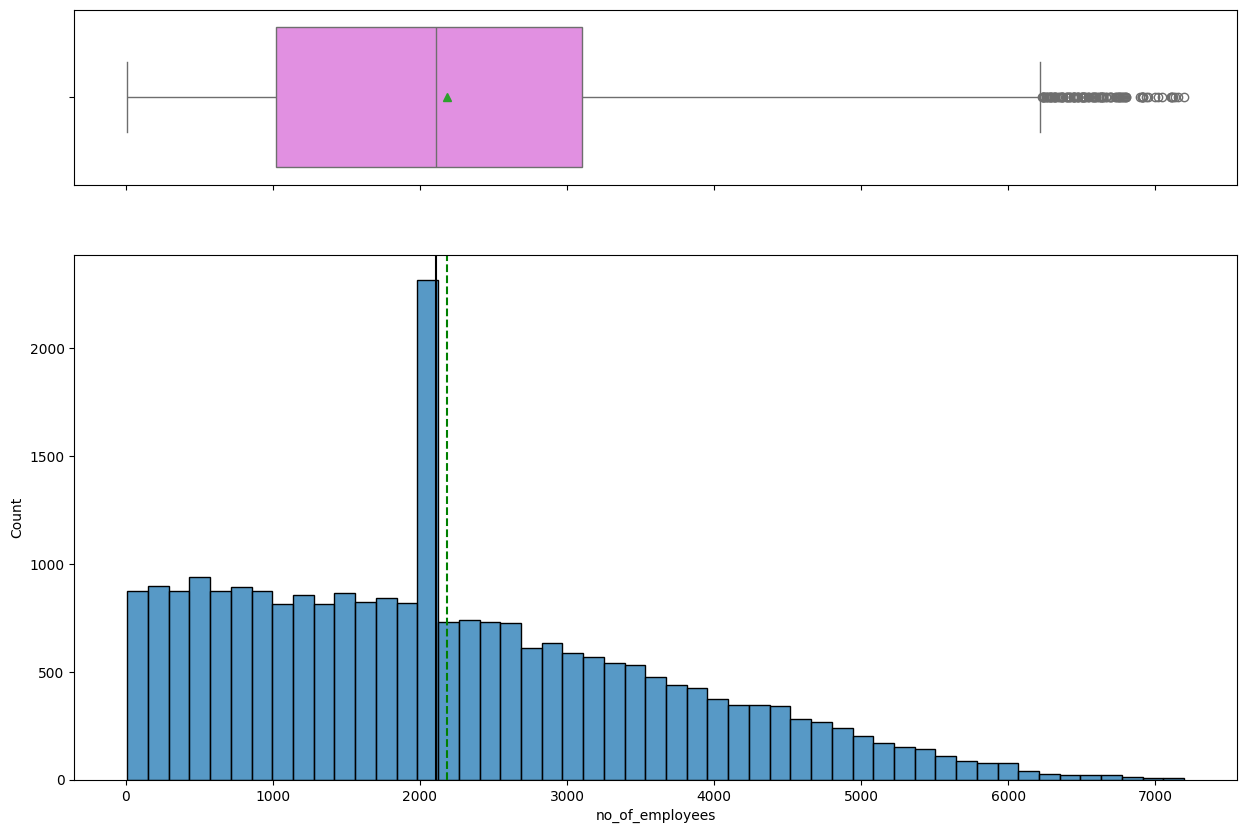

In [41]:
histogram_boxplot(data, "no_of_employees")

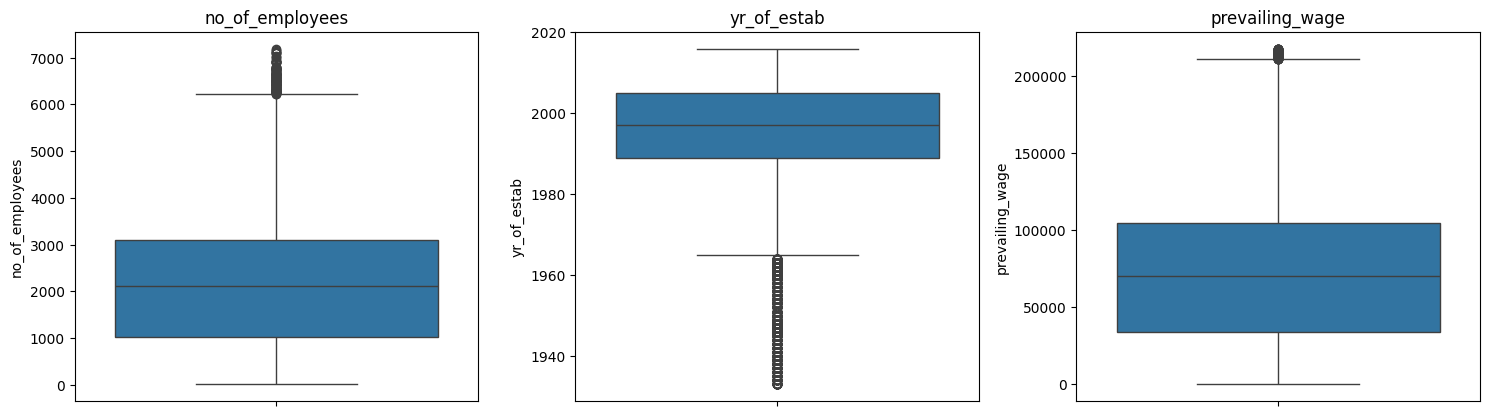

In [42]:
plt.figure(figsize=(15,12))

for i, variable in enumerate(num_cols):
  plt.subplot(3, 3, i+1)
  sns.boxplot(data[variable])
  plt.title(variable)

plt.tight_layout()
plt.show()

In [43]:
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

X = data.drop('case_status', axis=1)
Y = data['case_status']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [44]:
print("Shape of training set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of training set:  (17836, 28)
Shape of test set:  (7644, 28)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [45]:
def model_performance_classification_sklearn(model, predictors, target):

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],)

    return df_perf

In [46]:
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Decision Tree Classifier

In [47]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

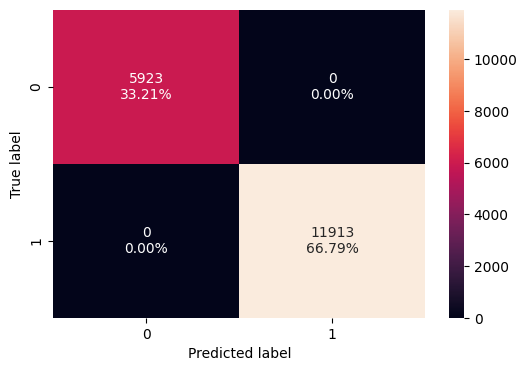

In [48]:
confusion_matrix_sklearn(model, X_train, y_train)
plt.show()

In [49]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


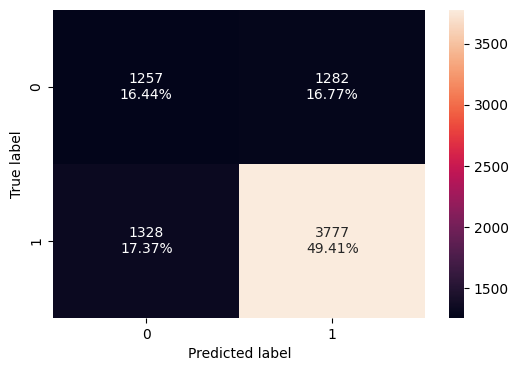

In [50]:
confusion_matrix_sklearn(model, X_test, y_test)
plt.show()

In [51]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.658556,0.739863,0.74659,0.743211


In [52]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

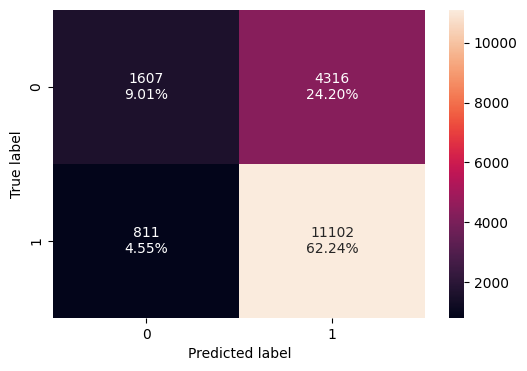

In [53]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)
plt.show()

In [54]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


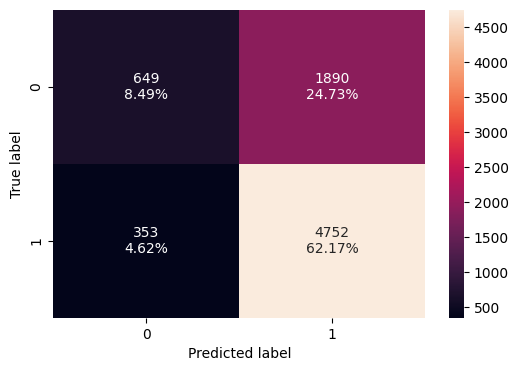

In [55]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)
plt.show()

In [56]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


## Building bagging and boosting models

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

##Bagging

In [57]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

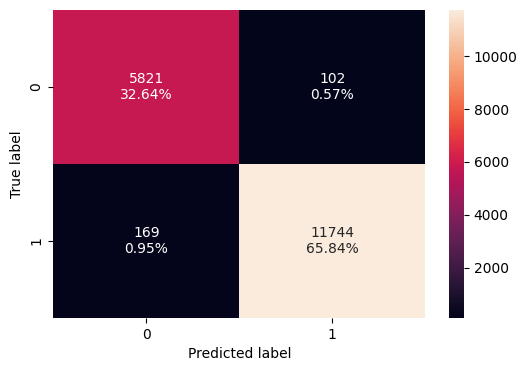

In [58]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)
plt.show()

In [59]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.984806,0.985814,0.991389,0.988594


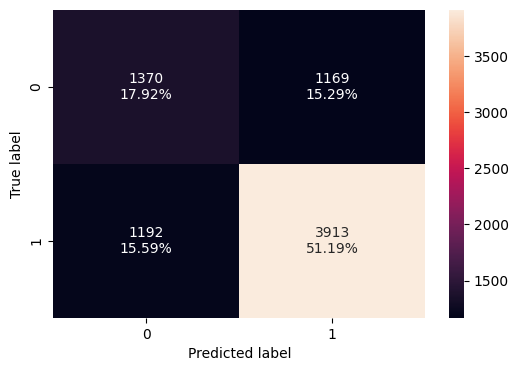

In [60]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)
plt.show()

In [61]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.69113,0.766503,0.769972,0.768234


In [62]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=0.7, n_estimators=75,
                  random_state=1)

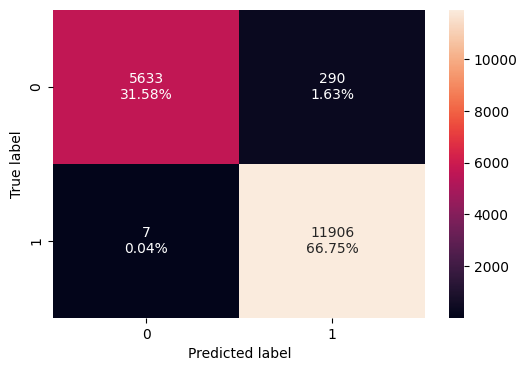

In [63]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)
plt.show()

In [64]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.983348,0.999412,0.976222,0.987681


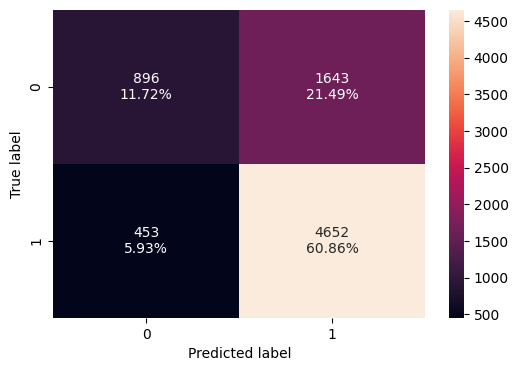

In [65]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)
plt.show()

In [66]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.725798,0.911263,0.738999,0.81614


####Random Forest Classifier

In [67]:
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

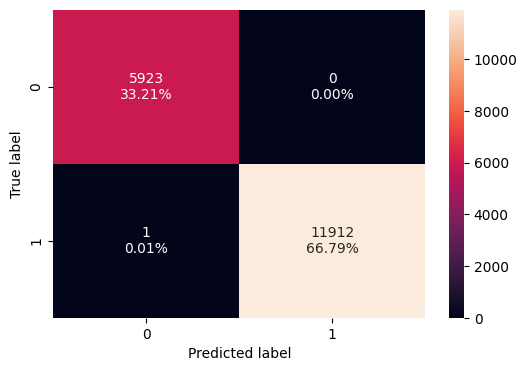

In [68]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)
plt.show()

In [69]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


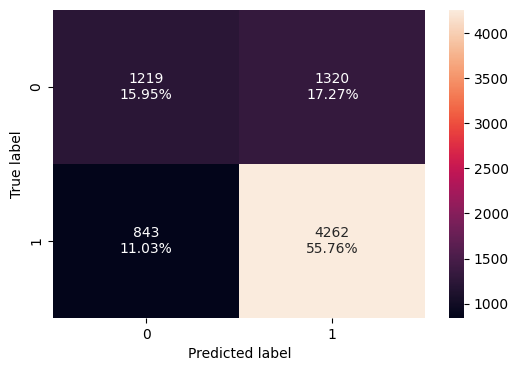

In [70]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)
plt.show()

In [71]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.717033,0.834868,0.763526,0.797605


In [72]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)

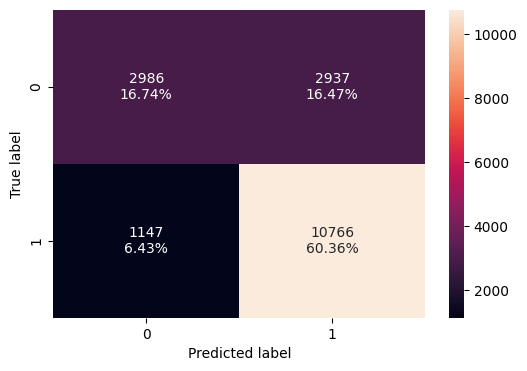

In [73]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)
plt.show()

In [74]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.771025,0.903719,0.785667,0.840568


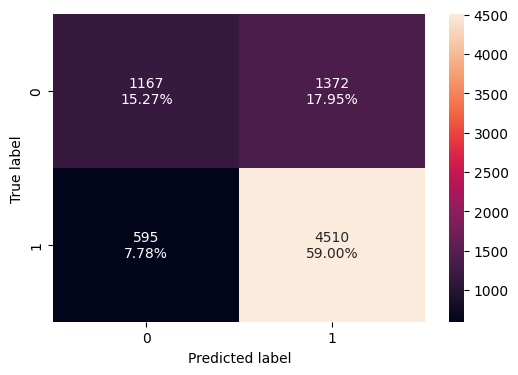

In [75]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)
plt.show()

In [76]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742674,0.883448,0.766746,0.82097


##Boosting

####Ada Boost Classifier

In [77]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

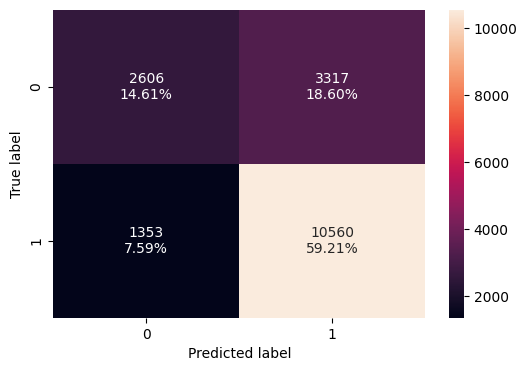

In [78]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)
plt.show()

In [79]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.73817,0.886427,0.760971,0.818922


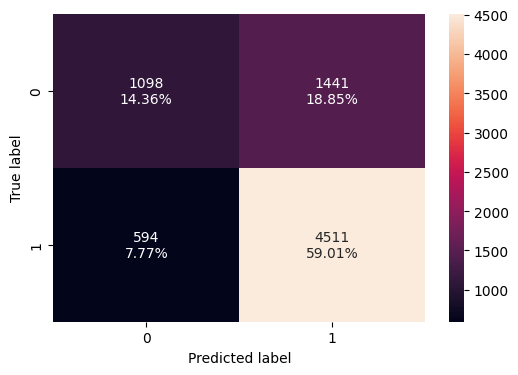

In [80]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)
plt.show()

In [81]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733778,0.883643,0.757897,0.815954


In [82]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, parameters, cv=5, scoring=acc_scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

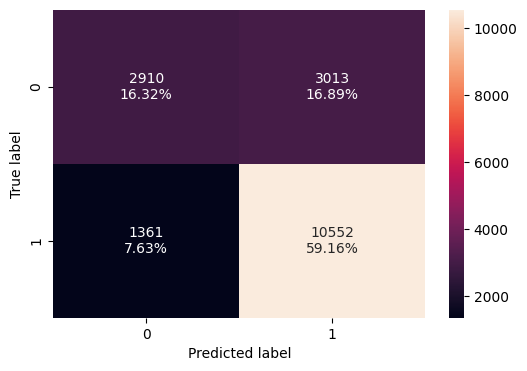

In [83]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)
plt.show()

In [84]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754766,0.885755,0.777884,0.828322


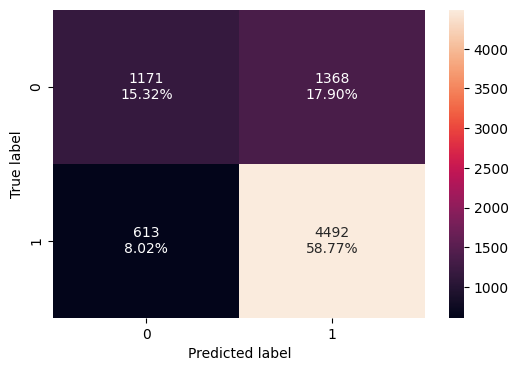

In [85]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)
plt.show()

In [86]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740842,0.879922,0.766553,0.819334


####Gradient Boosting Classifier

In [87]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

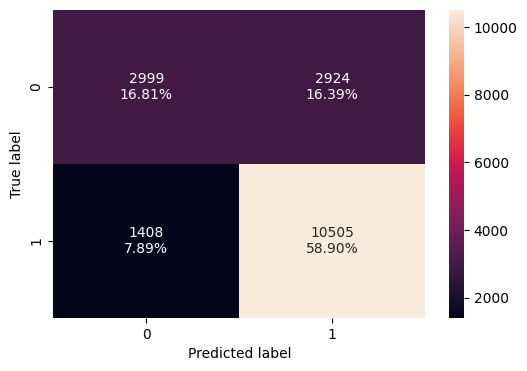

In [88]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)
plt.show()

In [89]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75712,0.88181,0.782262,0.829058


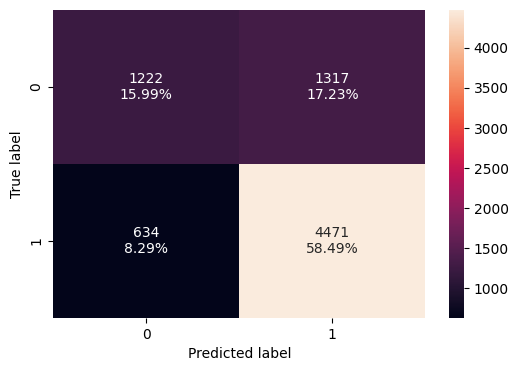

In [90]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)
plt.show()

In [91]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.875808,0.77246,0.820894


In [92]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1)

parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.9, random_state=1,
                           subsample=0.7)

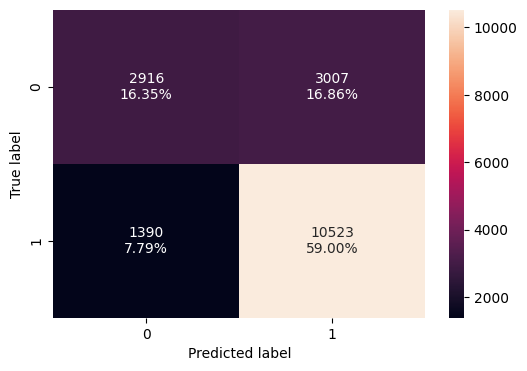

In [93]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)
plt.show()

In [94]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753476,0.883321,0.777753,0.827182


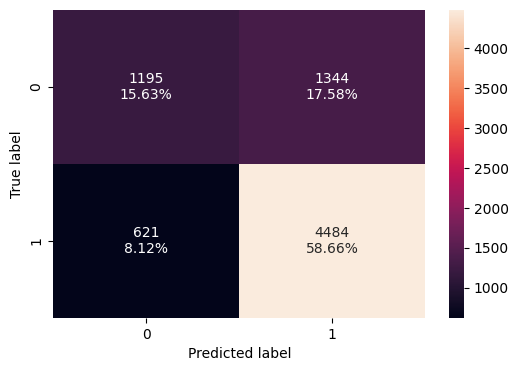

In [95]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)
plt.show()

In [96]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742936,0.878355,0.769389,0.820269


####XGB Classifier

In [97]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

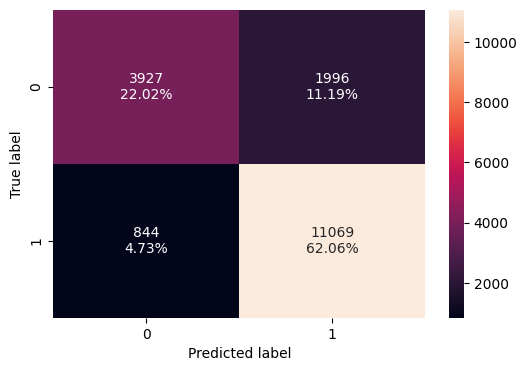

In [98]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)
plt.show()

In [99]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.840771,0.929153,0.847225,0.8863


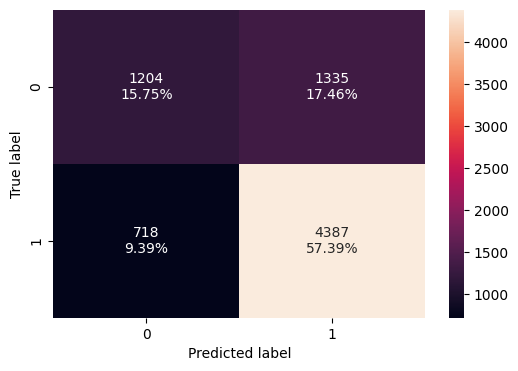

In [100]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)
plt.show()

In [101]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731423,0.859354,0.76669,0.810381


In [102]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

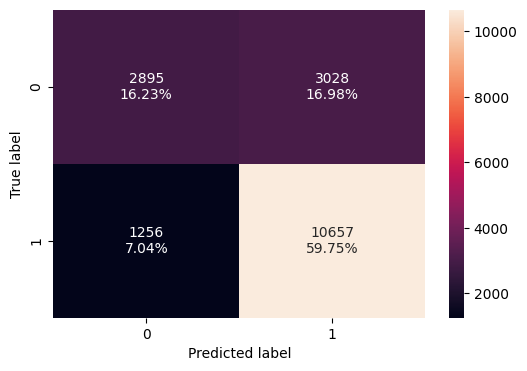

In [103]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)
plt.show()

In [104]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759812,0.894569,0.778736,0.832643


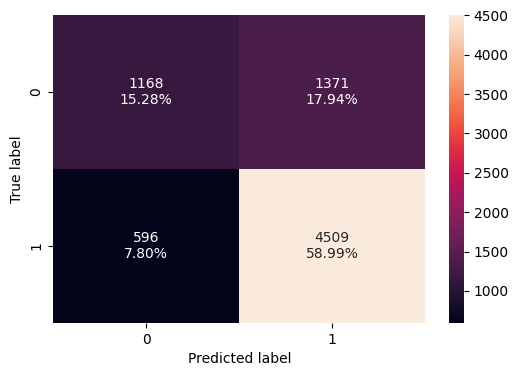

In [105]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)
plt.show()

In [106]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742674,0.883252,0.766837,0.820938


####Stacking Classifier

In [107]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       min_samples_split=5,
                                                       n_estimators=30,
                                                       oob_score...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

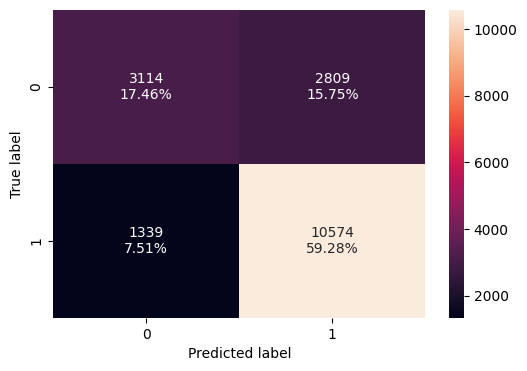

In [108]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)
plt.show()

In [109]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767437,0.887602,0.790107,0.836022


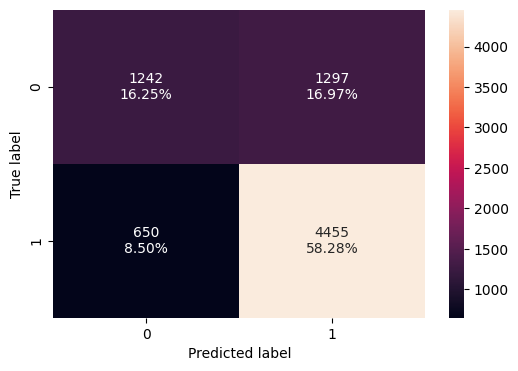

In [110]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)
plt.show()

In [111]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74529,0.872674,0.774513,0.820669


##  Will tuning the hyperparameters improve the model performance?

**Bagging:** *Hypertuning the parameters did relatively improve the model performance, as the accuracy, recall, and F1 score increased, but there was a lower precision after hypertuning.*

**Random Forest:** *Hypertuning the parameters improved the model performance, as all metrics improved.*

**Ada Boost:** *Hypertuning the parameters improved the model performance overall, although there was a slightly lower recall after tuning.*

**Gradient Boost:** *Hypertuning the parameters resulted in a slightly slower accuracy and precision, but an increased recall and F1 score.*

**XGB:** *Hypertuning the parameters improved the model performance, as all metrics improved.*

## Model Performance Comparison and Conclusions

In [112]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ], axis=1,)

models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.984806,0.983348,0.999944,0.771025,0.738170,0.754766,0.757120,0.753476,0.840771,0.759812,0.767437
Recall,1.0,0.931923,0.985814,0.999412,0.999916,0.903719,0.886427,0.885755,0.881810,0.883321,0.929153,0.894569,0.887602
Precision,1.0,0.720067,0.991389,0.976222,1.000000,0.785667,0.760971,0.777884,0.782262,0.777753,0.847225,0.778736,0.790107
F1,1.0,0.812411,0.988594,0.987681,0.999958,0.840568,0.818922,0.828322,0.829058,0.827182,0.886300,0.832643,0.836022


In [113]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ], axis=1,)

models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.658556,0.706567,0.691130,0.725798,0.717033,0.742674,0.733778,0.740842,0.744767,0.742936,0.731423,0.742674,0.745290
Recall,0.739863,0.930852,0.766503,0.911263,0.834868,0.883448,0.883643,0.879922,0.875808,0.878355,0.859354,0.883252,0.872674
Precision,0.746590,0.715447,0.769972,0.738999,0.763526,0.766746,0.757897,0.766553,0.772460,0.769389,0.766690,0.766837,0.774513
F1,0.743211,0.809058,0.768234,0.816140,0.797605,0.820970,0.815954,0.819334,0.820894,0.820269,0.810381,0.820938,0.820669


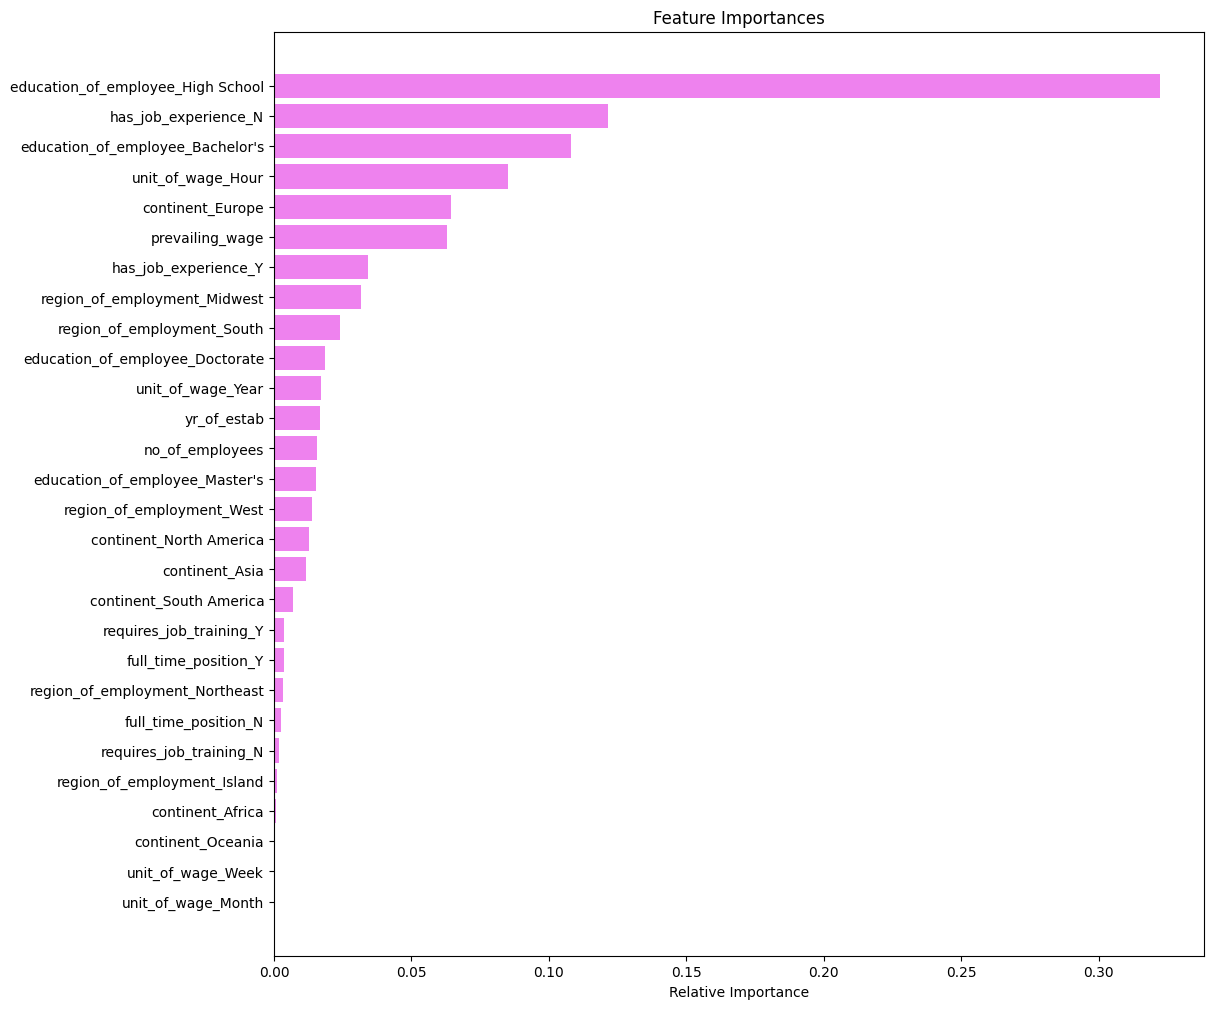

In [114]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [115]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df
print("Features and their importances:")
print(top_features)

Features and their importances:
                              Feature  Importance
11  education_of_employee_High School    0.322136
13               has_job_experience_N    0.121571
9    education_of_employee_Bachelor's    0.108119
22                  unit_of_wage_Hour    0.085271
5                    continent_Europe    0.064389
2                     prevailing_wage    0.062868
14               has_job_experience_Y    0.034130
18       region_of_employment_Midwest    0.031777
20         region_of_employment_South    0.023928
10    education_of_employee_Doctorate    0.018696
25                  unit_of_wage_Year    0.017044
1                         yr_of_estab    0.016775
0                     no_of_employees    0.015533
12     education_of_employee_Master's    0.015235
21          region_of_employment_West    0.013865
6             continent_North America    0.012616
4                      continent_Asia    0.011626
8             continent_South America    0.007099
16            requ

## Actionable Insights and Recommendations

**Insights:**

When comparing all of the models, the Decision Tree, Ada Boost, and Gradient Boost Classifiers all performed well when hypertuned across multiple metrics.

*Features:*
*   The most important feature in predicting the outcome is whether or not the employee has a high school education, as those with a high school education have a positive impact on visa approval.
*   Though significantly lower, the next most important features are work experience and a college degree. Those with work experience and at least a Bachelor's degree have a higher chance of being approved as well.

**Recommendations:**
*   In order to shortlist candidates with a higher chance of VISA approval, businesses should focus on those with at least a high school education, preferably also a Bachelor's degree. Though it would be important to focus on the level of education that they have, since they are significantly more likely to be approved if they have obtained a Doctorate or Master's degree.
*   Employees with work experience are very important to take note of as well, as a lack of work experience has a significantly negative impact on visa approval.
*   Businesses should also focus their attention on employees who are going to be earning an annual wage as opposed to hourly, because employees on an hourly wage will rarely be approved.







